# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:


# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=550)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=550)
lat_lngs = zip(lats, lngs)




# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 269


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

In [4]:
  # 5a Group cities in sets of 50 for logging purposes
# Initialize the variable i before using it
i = 0  

if (i % 50 == 0 and i >= 50):
    set_count += 1
    record_count = 0

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    #print (city_url)
    city_url
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
             
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]  
        city_max_temp = city_weather["main"]["temp_max"]  
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]       
        city_country = city_weather["sys"]["country"]      
        city_description = city_weather["weather"][0]["description"]
       
        
        # Convert the date to ISO standard.
        city_date = datetime.datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lon": city_lon,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Current Description": city_description,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except KeyError: 
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | port saint john's
Processing Record 3 of Set 1 | chon buri
Processing Record 4 of Set 1 | benjamin constant
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | yokadouma
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | hadibu
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | remire-montjoly
Processing Record 14 of Set 1 | la passe
Processing Record 15 of Set 1 | muli
Processing Record 16 of Set 1 | pyhajarvi
Processing Record 17 of Set 1 | st. john's
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | qalat
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | asino
Processing Record 22 of Set

In [6]:
city_data_df = pd.DataFrame(city_data)

city_data_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,Bredasdorp,-34.5322,20.0403,283.53,73,0,2.55,ZA,clear sky,2024-05-10 03:48:04
1,Port Saint John'S,-31.6229,29.5448,294.14,51,5,2.53,ZA,clear sky,2024-05-10 03:48:04
2,Chon Buri,13.3000,101.3000,309.50,56,100,2.30,TH,overcast clouds,2024-05-10 03:48:04
3,Benjamin Constant,-4.3831,-70.0311,298.22,98,25,0.27,BR,scattered clouds,2024-05-10 03:48:04
4,Yellowknife,62.4560,-114.3525,285.44,59,20,4.63,CA,few clouds,2024-05-10 03:48:05


In [7]:
#  Export the City_Data into a csv
#city_data_df.to_csv(C, index_label="City_ID")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
city_data_df = pd.read_csv("output_data/cities.csv", dtype="object", encoding="utf-8")

print(city_data_df.count())

City_ID                254
City                   254
Lat                    254
Lon                    254
Max Temp               254
Humidity               254
Cloudiness             254
Wind Speed             254
Country                250
Current Description    254
Date                   254
dtype: int64


In [9]:
city_data_df.head()


,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,0,Bredasdorp,-34.5322,20.0403,283.53,73,0,2.55,ZA,clear sky,2024-05-10 03:48:04
1,1,Port Saint John'S,-31.6229,29.5448,294.14,51,5,2.53,ZA,clear sky,2024-05-10 03:48:04
2,2,Chon Buri,13.3,101.3,309.5,56,100,2.3,TH,overcast clouds,2024-05-10 03:48:04
3,3,Benjamin Constant,-4.3831,-70.0311,298.22,98,25,0.27,BR,scattered clouds,2024-05-10 03:48:04
4,4,Yellowknife,62.456,-114.3525,285.44,59,20,4.63,CA,few clouds,2024-05-10 03:48:05


In [10]:

# Convert "Max Temp" column to numeric type
city_data_df["Max Temp"] = pd.to_numeric(city_data_df["Max Temp"])
city_data_df["Lat"] = pd.to_numeric(city_data_df["Lat"])
city_data_df["Lon"] = pd.to_numeric(city_data_df["Lon"])
city_data_df["Lon"] = city_data_df["Lon"].round(0)

# convert strg to int
city_data_df["Humidity"] = pd.to_numeric(city_data_df["Humidity"])


# Round the "Max Temp" column to the nearest whole number
city_data_df["Max Temp"] = city_data_df["Max Temp"].round(0)
city_data_df["Lat"] = city_data_df["Lat"].round(0)

city_data_df["Cloudiness"]= pd.to_numeric(city_data_df["Cloudiness"])
city_data_df['Wind Speed']= pd.to_numeric(city_data_df['Wind Speed'])


# Display the first few rows of the DataFrame
city_data_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,0,Bredasdorp,-35.0,20.0,284.0,73,0,2.55,ZA,clear sky,2024-05-10 03:48:04
1,1,Port Saint John'S,-32.0,30.0,294.0,51,5,2.53,ZA,clear sky,2024-05-10 03:48:04
2,2,Chon Buri,13.0,101.0,310.0,56,100,2.30,TH,overcast clouds,2024-05-10 03:48:04
3,3,Benjamin Constant,-4.0,-70.0,298.0,98,25,0.27,BR,scattered clouds,2024-05-10 03:48:04
4,4,Yellowknife,62.0,-114.0,285.0,59,20,4.63,CA,few clouds,2024-05-10 03:48:05


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

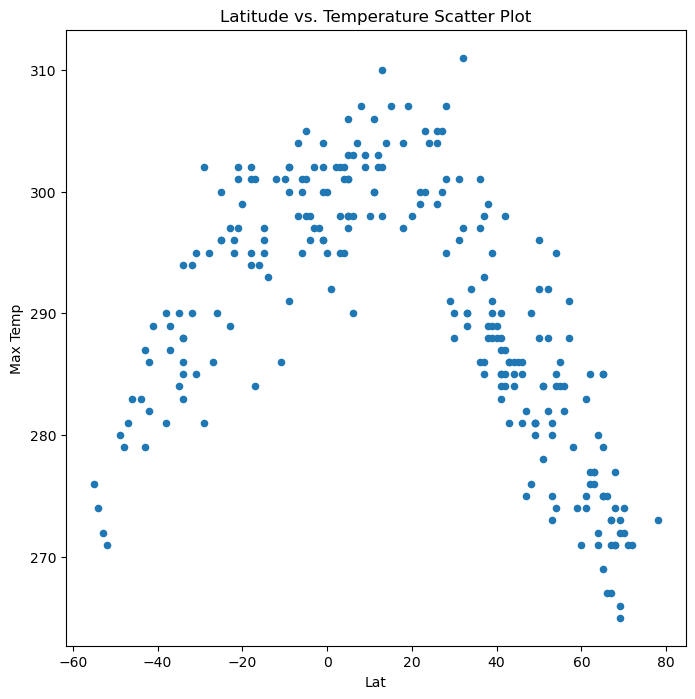

In [12]:
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid= False, figsize=(8,8),
              title='Latitude vs. Temperature Scatter Plot')

plt.savefig("output_data/Fig1Temp.png")

plt.show()

#### Latitude Vs. Humidity

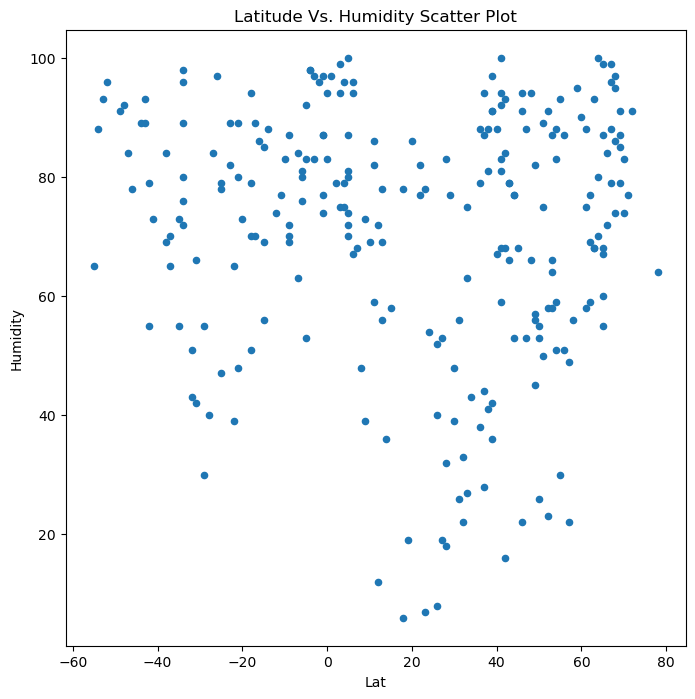

In [15]:

city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid= False, figsize=(8,8),
              title='Latitude Vs. Humidity Scatter Plot')

# Define the range for the x-axis
x_values = range(-60, 40)  
y_values = range (0,100)
# Create a list of x-ticks based on the range
x_ticks = [value for value in x_values]
y_ticks = [value for value in y_values]


# Set the x-ticks on the plot

marker_size=40

plt.savefig("output_data/Fig2Hum.png")


plt.show()

#### Latitude Vs. Cloudiness

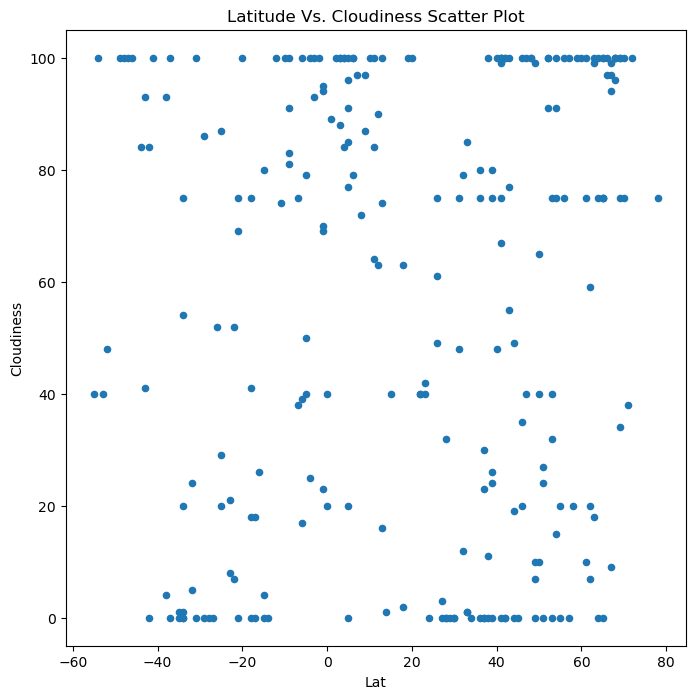

In [17]:

city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid= False, figsize=(8,8),
              title='Latitude Vs. Cloudiness Scatter Plot')

# Define the range for the x-axis
x_values = range(-60, 40)  
y_values = range (0,100)
# Create a list of x-ticks based on the range
x_ticks = [value for value in x_values]
y_ticks = [value for value in y_values]


# Set the x-ticks on the plot

marker_size=40

plt.savefig("output_data/Fig3Cloud.png")


plt.show()

#### Latitude vs. Wind Speed Plot

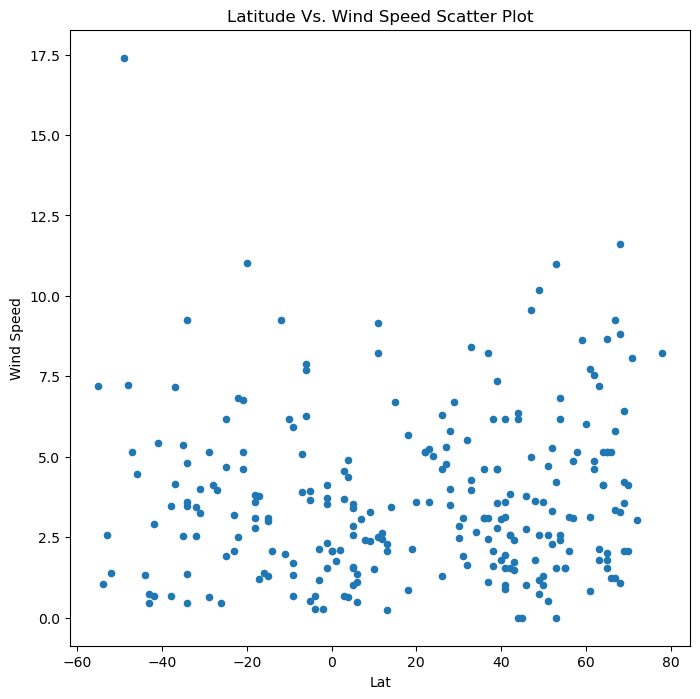

In [19]:
# 17 Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# 18 Incorporate the other graph properties
# YOUR CODE HERE

# 19 Save the figure
#plt.savefig("output_data/Fig4b.png")

# 20 Show plot
#plt.show()



city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid= False, figsize=(8,8),
              title='Latitude Vs. Wind Speed Scatter Plot')

# Define the range for the x-axis
x_values = range(-60, 40)  
y_values = range (0,100)
# Create a list of x-ticks based on the range
x_ticks = [value for value in x_values]
y_ticks = [value for value in y_values]


# Set the x-ticks on the plot

marker_size=40

plt.savefig("output_data/Fig4wind.png")


plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
#21  Define a function to create Linear Regression plots
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression

def create_linear_regression_model():
    # Create a Linear Regression model
    Lin_Regress = LinearRegression()
    return model

In [21]:
#####
correlation = st.pearsonr(city_data_df['Lat'],city_data_df['Max Temp'])
print(f"The correlation between lat and max Temp is {round(correlation[0],2)}")

The correlation between lat and max Temp is -0.43


The r-squared is: 0.185


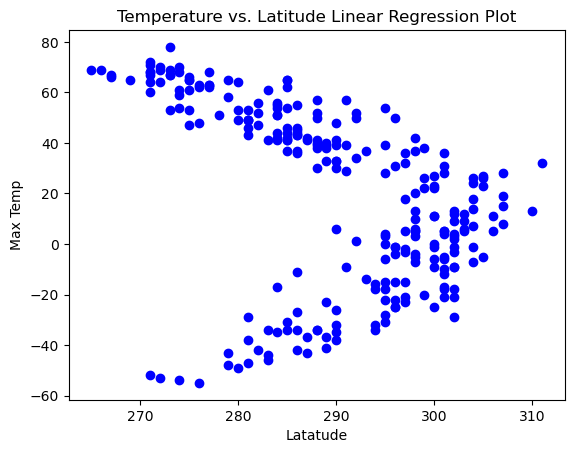

In [22]:
# 21 Add the linear regression equation and line to plot
# Calculate linear regression model Temperature vs. Latitude Linear Regression
(slope, intercept,rvalue, pvalue, stderr)= linregress(city_data_df['Lat'],city_data_df['Max Temp'])

regress_values = city_data_df['Lat'] * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(city_data_df['Max Temp'], city_data_df['Lat'], color='b')


plt.annotate(line_eq,(-20,-5), fontsize=14)
plt.xlabel("Latatude")
plt.ylabel("Max Temp")
plt.title("Temperature vs. Latitude Linear Regression Plot")
print(f"The r-squared is: {round(rvalue**2,3)}")



plt.show()


In [23]:
def create_linear_regression_plot(x, y, hemisphere):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
    
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, slope*x + intercept, color='red', label='Regression Line')
    
    plt.xlabel('Latitude')
    plt.ylabel('Temperature')
    plt.title(f'{hemisphere} Hemisphere: Temperature vs. Latitude')
    plt.legend()

plt.show()


In [24]:
# 22 Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Filter the DataFrame for Northern Hemisphere data
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display the Northern Hemisphere DataFrame
northern_hemisphere_df.head()


,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
2,2,Chon Buri,13.0,101.0,310.0,56,100,2.30,TH,overcast clouds,2024-05-10 03:48:04
4,4,Yellowknife,62.0,-114.0,285.0,59,20,4.63,CA,few clouds,2024-05-10 03:48:05
5,5,Ilulissat,69.0,-51.0,265.0,79,75,2.06,GL,broken clouds,2024-05-10 03:48:05
7,7,Yokadouma,4.0,15.0,295.0,96,100,0.63,CM,overcast clouds,2024-05-10 03:48:05
8,8,Hawaiian Paradise Park,20.0,-155.0,298.0,86,100,3.60,US,light rain,2024-05-10 03:48:05


In [25]:
# 24 Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Filter the DataFrame for Southern Hemisphere data
southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display the Southern Hemisphere DataFrame
southern_hemisphere_df.head()

,City_ID,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Current Description,Date
0,0,Bredasdorp,-35.0,20.0,284.0,73,0,2.55,ZA,clear sky,2024-05-10 03:48:04
1,1,Port Saint John'S,-32.0,30.0,294.0,51,5,2.53,ZA,clear sky,2024-05-10 03:48:04
3,3,Benjamin Constant,-4.0,-70.0,298.0,98,25,0.27,BR,scattered clouds,2024-05-10 03:48:04
6,6,Blackmans Bay,-43.0,147.0,287.0,89,93,0.45,AU,overcast clouds,2024-05-10 03:48:05
9,9,Adamstown,-25.0,-130.0,296.0,79,87,4.68,PN,light rain,2024-05-10 03:46:49


###  Temperature vs. Latitude Linear Regression Plot

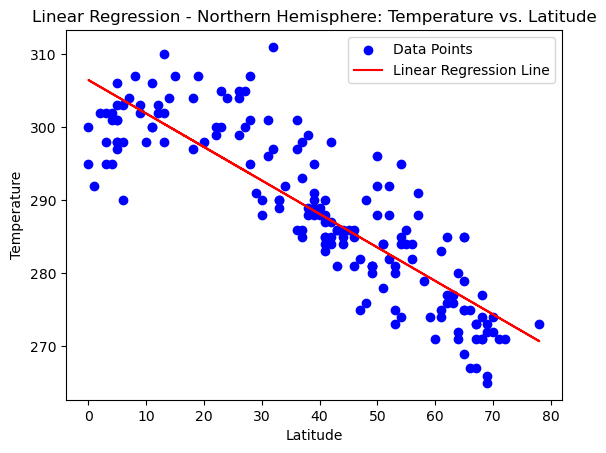

In [26]:
# 26 Linear regression on Northern Hemisphere

# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Temperature vs. Latitude')
plt.legend()
plt.show()

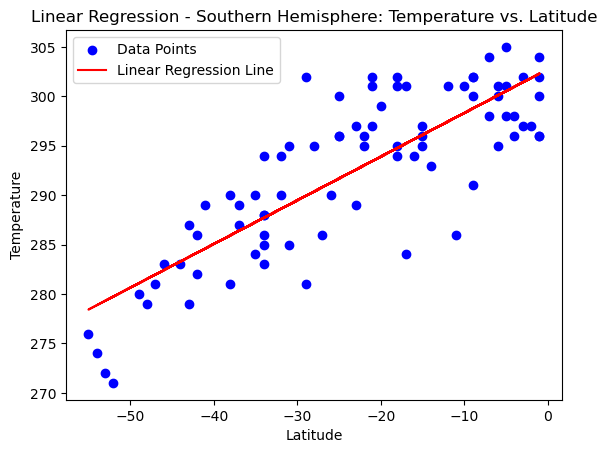

In [27]:
# 27  Linear regression on Southern Hemisphere

southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]
# Extract the independent variable (X) and dependent variable (y)
X = southern_hemisphere_df['Lat']
y = southern_hemisphere_df['Max Temp']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (-55,30), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Southern Hemisphere: Temperature vs. Latitude')
plt.legend()
plt.show()

**Discussion about the linear relationship:** This information can be valuable for predicting temperature trends based on geographical location.
as you get closer to the equato the temp risies.

### Humidity vs. Latitude Linear Regression Plot

In [30]:
# 28 Northern Hemisphere
# YOUR CODE HERE

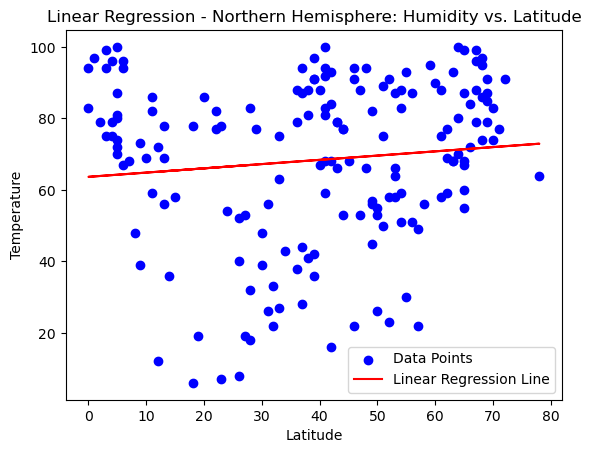

In [31]:
# 26 Linear regression on Northern Hemisphere

# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Humidity vs. Latitude')
plt.legend()
plt.show()

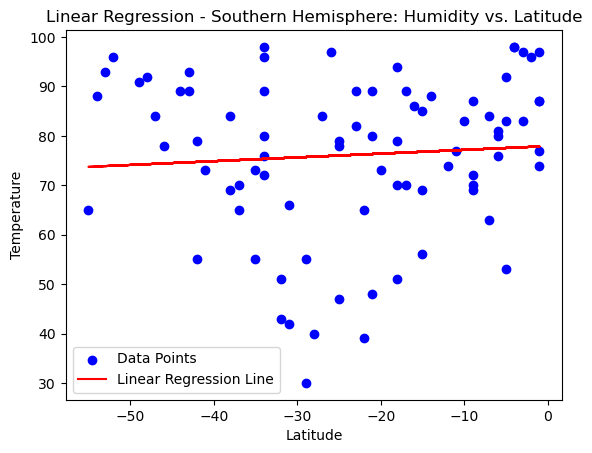

In [32]:
# 29 Southern Hemisphere
# Extract the independent variable (X) and dependent variable (y)
X = southern_hemisphere_df['Lat']
y = southern_hemisphere_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Southern Hemisphere: Humidity vs. Latitude')
plt.legend()
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

In [33]:
northern_hemisphere_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 2 to 252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City_ID              172 non-null    object 
 1   City                 172 non-null    object 
 2   Lat                  172 non-null    float64
 3   Lon                  172 non-null    float64
 4   Max Temp             172 non-null    float64
 5   Humidity             172 non-null    int64  
 6   Cloudiness           172 non-null    int64  
 7   Wind Speed           172 non-null    float64
 8   Country              172 non-null    object 
 9   Current Description  172 non-null    object 
 10  Date                 172 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 16.1+ KB


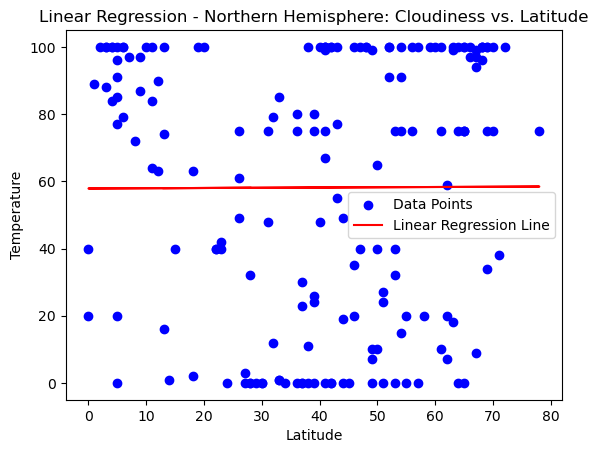

In [34]:
# 30 Northern Hemisphere
# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Cloudiness']



# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Cloudiness vs. Latitude')
plt.legend()
plt.show()

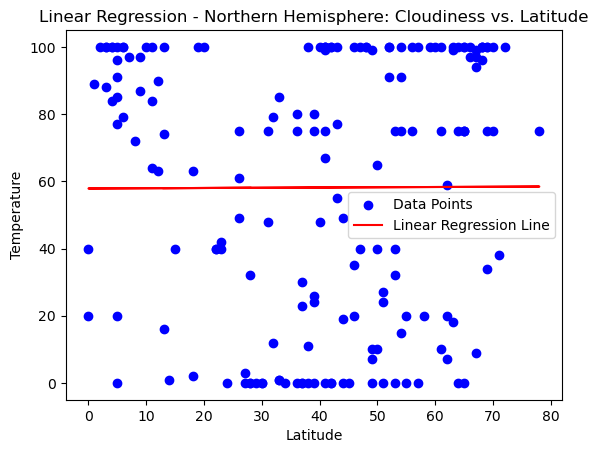

In [35]:
#31  Southern Hemisphere
# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Cloudiness']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Cloudiness vs. Latitude')
plt.legend()
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

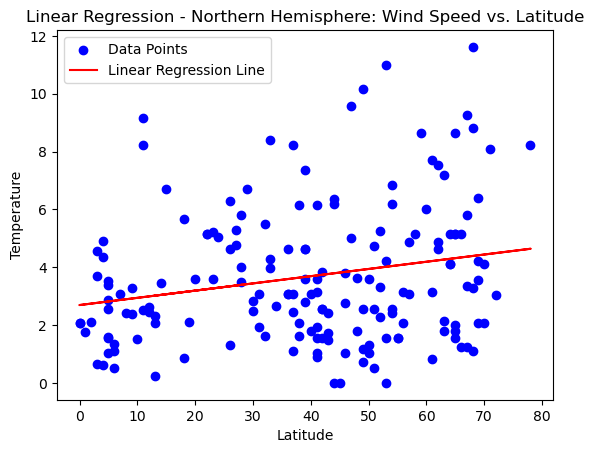

In [36]:
# 32 Northern Hemisphere
# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Wind Speed']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Wind Speed vs. Latitude')
plt.legend()
plt.show()

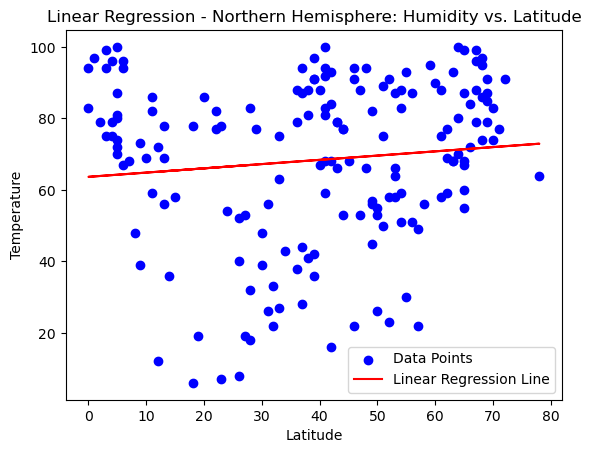

In [37]:
# 33 Southern Hemisphere
# Extract the independent variable (X) and dependent variable (y)
X = northern_hemisphere_df['Lat']
y = northern_hemisphere_df['Humidity']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Linear Regression - Northern Hemisphere: Humidity vs. Latitude')
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE